# Complex Matrices

## 1) Definition

A **complex matrix** $A \in \mathbb{C}^{m \times n}$ has entries:

$$
A = [a_{ij}], \quad a_{ij} = x_{ij} + i y_{ij}, \quad x_{ij}, y_{ij} \in \mathbb{R}
$$

- **Conjugate transpose:** $A^* = \overline{A}^T$
- **Hermitian matrix:** $A = A^*$, generalization of symmetric matrices to complex numbers
- **Unitary matrix:** $U^* U = I$


## 2) Derivation

1. For any complex matrix $A$ and vector $\mathbf{v}$:

$$
A \mathbf{v} = \mathbf{w}, \quad \mathbf{v}, \mathbf{w} \in \mathbb{C}^n
$$

2. Hermitian property:
$$
A = A^* \implies \mathbf{v}^* A \mathbf{v} \in \mathbb{R}
$$

3. Eigenvalues of Hermitian matrices are real, eigenvectors form an orthonormal basis.

4. Unitary matrices preserve norms:
$$
\| U \mathbf{v} \|_2 = \| \mathbf{v} \|_2
$$


## 3) Computation Steps (Complex Matrix Example)

**Step 1:** Define a complex matrix $A \in \mathbb{C}^{n \times n}$.

**Step 2:** Compute conjugate transpose:
$$
A^* = \overline{A}^T
$$

**Step 3:** Check Hermitian property:
$$
A = A^* ?
$$

**Step 4:** Compute eigenvalues and eigenvectors:
$$
A \mathbf{v}_i = \lambda_i \mathbf{v}_i
$$

**Step 5 (Optional):** Check unitary property for $U$:
$$
U^* U = I
$$


In [1]:
import jax.numpy as jnp

# Define complex matrix
A = jnp.array([[2+1j, 1-1j],
               [1+1j, 3+0j]])

# Step 2: Conjugate transpose
A_star = jnp.conj(A.T)

# Step 3: Check Hermitian
is_hermitian = jnp.allclose(A, A_star)

# Step 4: Eigenvalues and eigenvectors
eigvals, eigvecs = jnp.linalg.eig(A)

print("Matrix A:\n", A)
print("Conjugate transpose A*:\n", A_star)
print("Is Hermitian:", is_hermitian)
print("Eigenvalues:", eigvals)
print("Eigenvectors (columns):\n", eigvecs)


Matrix A:
 [[2.+1.j 1.-1.j]
 [1.+1.j 3.+0.j]]
Conjugate transpose A*:
 [[2.-1.j 1.-1.j]
 [1.+1.j 3.-0.j]]
Is Hermitian: False
Eigenvalues: [1.0749469+0.67543197j 3.9250536+0.32456762j]
Eigenvectors (columns):
 [[ 0.8218468 +0.j          0.5134983 -0.24675332j]
 [-0.24675333-0.5134984j   0.8218468 +0.j        ]]


# Fast Fourier Transform (FFT)

## 1) Definition

The **Discrete Fourier Transform (DFT)** of a sequence $x_0, x_1, \dots, x_{N-1}$ is:

$$
X_k = \sum_{n=0}^{N-1} x_n e^{-2 \pi i k n / N}, \quad k = 0, \dots, N-1
$$

The **FFT** is an efficient algorithm to compute the DFT in $O(N \log N)$ instead of $O(N^2)$.


## 2) Derivation

1. Start from DFT:
$$
X_k = \sum_{n=0}^{N-1} x_n e^{-2 \pi i k n / N}
$$

2. Split sum into even and odd indices:
$$
X_k = \sum_{n=0}^{N/2-1} x_{2n} e^{-2 \pi i k (2n)/N} + \sum_{n=0}^{N/2-1} x_{2n+1} e^{-2 \pi i k (2n+1)/N}
$$

3. Factorize exponential:
$$
X_k = \sum_{n=0}^{N/2-1} x_{2n} e^{-2 \pi i k n/(N/2)} + e^{-2 \pi i k /N} \sum_{n=0}^{N/2-1} x_{2n+1} e^{-2 \pi i k n/(N/2)}
$$

4. Recursively compute DFT of even and odd parts → FFT algorithm.


## 3) Computation Steps (FFT Example)

**Step 1:** Define input sequence $x = [x_0, x_1, \dots, x_{N-1}]$.

**Step 2:** Compute FFT using JAX:
$$
X = \text{jax.numpy.fft.fft}(x)
$$

**Step 3:** Compute inverse FFT (optional):
$$
x = \text{jax.numpy.fft.ifft}(X)
$$

**Step 4 (Optional):** Verify reconstruction:
$$
\text{ifft(fft(x))} \approx x
$$


In [3]:
# Define signal
t = jnp.linspace(0, 1, 8, endpoint=False)
x = jnp.sin(2*jnp.pi*3*t) + 0.5*jnp.cos(2*jnp.pi*1*t)

# Compute FFT
X = jnp.fft.fft(x)

# Compute inverse FFT
x_reconstructed = jnp.fft.ifft(X)

print("Original signal x:\n", x)
print("FFT X:\n", X)
print("Reconstructed x (ifft):\n", x_reconstructed)


Original signal x:
 [ 0.5         1.0606601  -1.          0.35355338 -0.5        -1.0606601
  1.         -0.35355398]
FFT X:
 [-5.9604645e-07+0.0000000e+00j  1.9999995e+00-2.3841858e-07j
  0.0000000e+00-5.9604645e-07j  4.7683716e-07-4.0000000e+00j
  5.9604645e-07+0.0000000e+00j  4.7683716e-07+4.0000000e+00j
  0.0000000e+00+5.9604645e-07j  1.9999995e+00+2.3841858e-07j]
Reconstructed x (ifft):
 [ 0.5       +0.j  1.06066   +0.j -0.99999994+0.j  0.35355327+0.j
 -0.5       +0.j -1.06066   +0.j  0.99999994+0.j -0.35355386+0.j]


## 4) Plotting

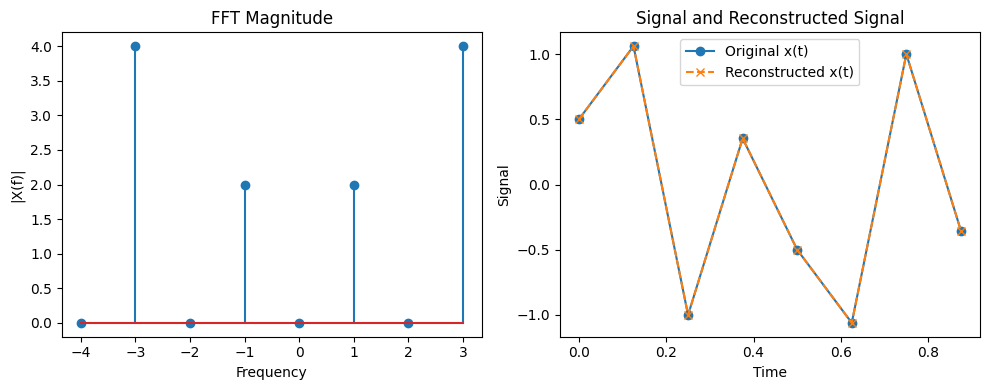

In [6]:
import matplotlib.pyplot as plt

N = len(x)
freqs = jnp.fft.fftfreq(N, d=(t[1]-t[0]))

plt.figure(figsize=(10,4))

# FFT Magnitude
plt.subplot(1,2,1)
plt.stem(freqs, jnp.abs(X))  # removed use_line_collection
plt.xlabel('Frequency')
plt.ylabel('|X(f)|')
plt.title('FFT Magnitude')

# Original vs Reconstructed Signal
plt.subplot(1,2,2)
plt.plot(t, x, 'o-', label='Original x(t)')
plt.plot(t, x_reconstructed.real, 'x--', label='Reconstructed x(t)')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Signal and Reconstructed Signal')
plt.legend()
plt.tight_layout()
plt.show()


## 5) Use Cases of Complex Matrices and FFT

**Complex Matrices:**
1. Quantum mechanics: Unitary and Hermitian operators.
2. Signal processing: Represent signals in complex form.
3. Control systems: Eigenvalue analysis of complex matrices.
4. Electrical engineering: Impedance and phasor calculations.

**FFT:**
1. Audio processing: Spectrum analysis and filtering.
2. Image processing: Compression (JPEG, PNG) and filtering.
3. Communications: OFDM and modulated signals.
4. PDEs: Solve differential equations using spectral methods.
5. Scientific computing: Fast convolution and correlation.
